In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
import sounddevice as sd
import random

In [2]:
# Lấy list wav files từ 1 folder
def get_wav_files(folder_path):
    wav_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                wav_files.append(os.path.join(root, file))
    return wav_files

base_audio_train_folder = "NguyenAmHuanLuyen-16k"
audio_train_folders = [os.path.join(base_audio_train_folder, folder) for folder in os.listdir(base_audio_train_folder)]
audio_train_file_paths = []
for folder in audio_train_folders:
    folder_name = os.path.basename(folder)
    item = {
        'folder_name': folder_name,
        'audio_files': get_wav_files(folder)
    }
    audio_train_file_paths.append(item)

print(audio_train_file_paths)

[{'folder_name': '23MTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\23MTL\\a.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\e.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\i.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\o.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\u.wav']}, {'folder_name': '24FTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\24FTL\\a.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\e.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\i.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\o.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\u.wav']}, {'folder_name': '25MLM', 'audio_files': ['NguyenAmHuanLuyen-16k\\25MLM\\a.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\e.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\i.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\o.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\u.wav']}, {'folder_name': '27MCM', 'audio_files': ['NguyenAmHuanLuyen-16k\\27MCM\\a.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\e.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\i.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\o.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\u.wav']}, {'folder_name': '28MVN', 'audio_files': ['Nguye

In [8]:
# Hàm chọn random 4 phần tử trong mảng
def random_select_4_elements(arr):
    selected_elements = random.sample(arr, 4)
    return selected_elements

seletected_elements_folder_audio_data = random_select_4_elements(audio_train_file_paths)
seletected_elements_folder_audio_data = audio_train_file_paths[0:4]
print(seletected_elements_folder_audio_data)

[{'folder_name': '23MTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\23MTL\\a.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\e.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\i.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\o.wav', 'NguyenAmHuanLuyen-16k\\23MTL\\u.wav']}, {'folder_name': '24FTL', 'audio_files': ['NguyenAmHuanLuyen-16k\\24FTL\\a.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\e.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\i.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\o.wav', 'NguyenAmHuanLuyen-16k\\24FTL\\u.wav']}, {'folder_name': '25MLM', 'audio_files': ['NguyenAmHuanLuyen-16k\\25MLM\\a.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\e.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\i.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\o.wav', 'NguyenAmHuanLuyen-16k\\25MLM\\u.wav']}, {'folder_name': '27MCM', 'audio_files': ['NguyenAmHuanLuyen-16k\\27MCM\\a.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\e.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\i.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\o.wav', 'NguyenAmHuanLuyen-16k\\27MCM\\u.wav']}]


In [4]:
# Hàm tạo plot mel spectrogram
def plot_mel_spectrogram(y, sr, n_fft=256, hop_length=64, time_division=0.2, title="Mel spectrogram"):
    mel_spectrogram = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Chuyển spectrogram sang db scale
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)

    # Vẽ biểu đồ mel spectrogram
    plt.figure(figsize=(12,8))
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='linear', sr=sr, hop_length=hop_length, cmap='jet')
    plt.colorbar(format='%+2.0f dB')

    # time
    time = np.arange(0, len(y)) / sr # Độ dài tín hiệu chia cho tần số lấy mẫu

    # Set label cho trục và title
    plt.xlabel("Time (s)")
    plt.xticks(np.arange(0, max(time), time_division))
    plt.ylabel("Frequency (Hz)")
    plt.title(title)

    plt.tight_layout()
    plt.show()

def plot_original_audio(y, sr, time_division=0.2, title='Original Audio'):
    plt.figure(figsize=(12, 8))
    time = np.arange(0, len(y)) / sr
    plt.plot(time, y)
    plt.title(title)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.xticks(np.arange(0, max(time), time_division))
    plt.show()

    
    

-----------CHARTS FOR 23MTL-----------
NguyenAmHuanLuyen-16k\23MTL\a.wav NguyenAmHuanLuyen-16k\23MTL\a


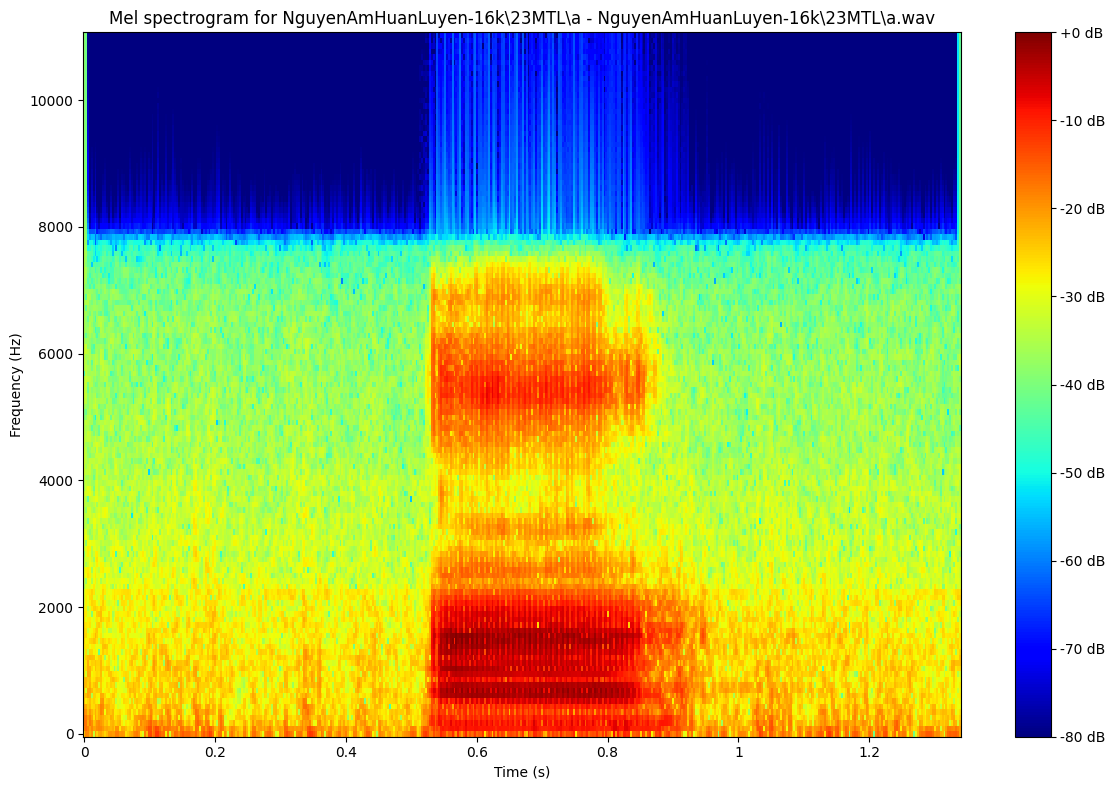

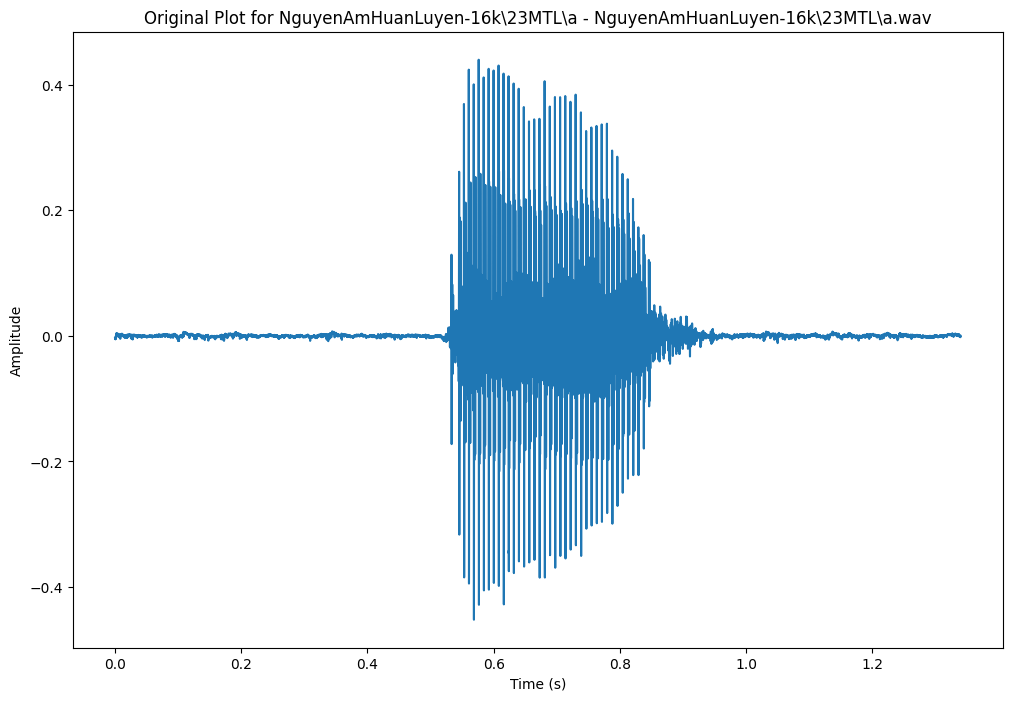

NguyenAmHuanLuyen-16k\23MTL\e.wav NguyenAmHuanLuyen-16k\23MTL\e


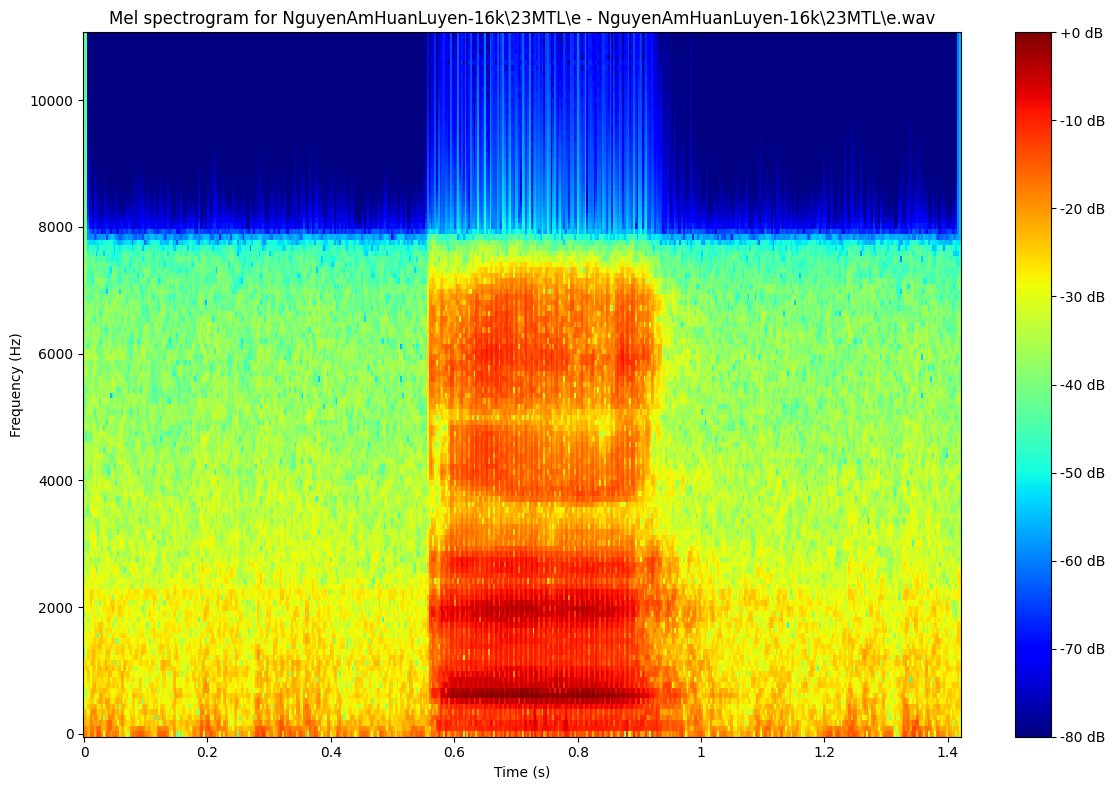

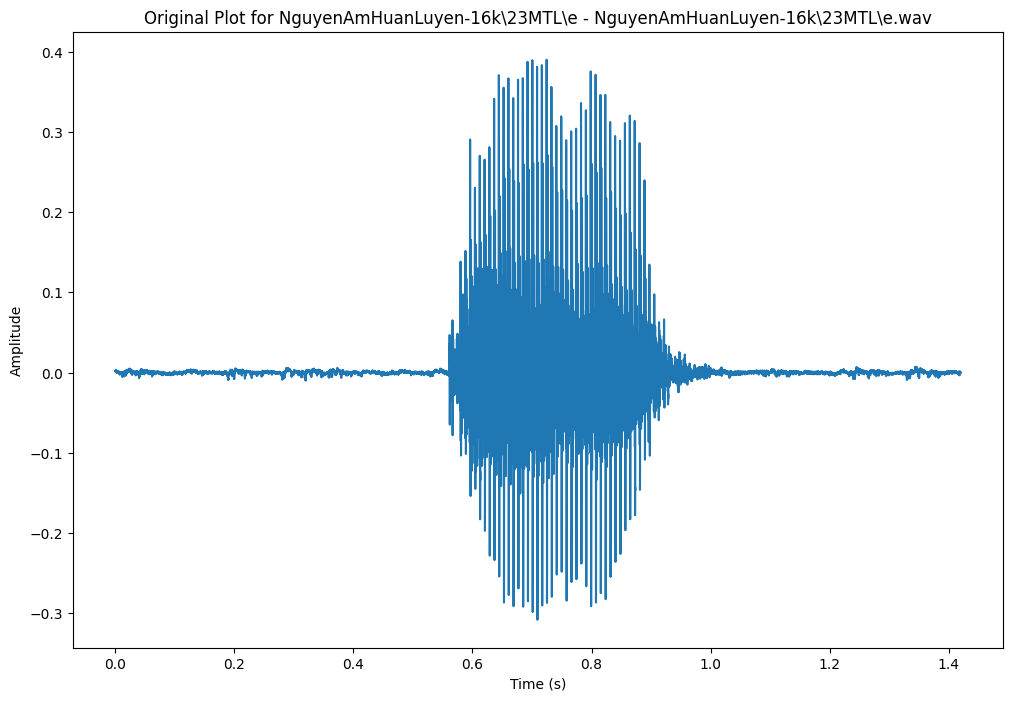

NguyenAmHuanLuyen-16k\23MTL\i.wav NguyenAmHuanLuyen-16k\23MTL\i


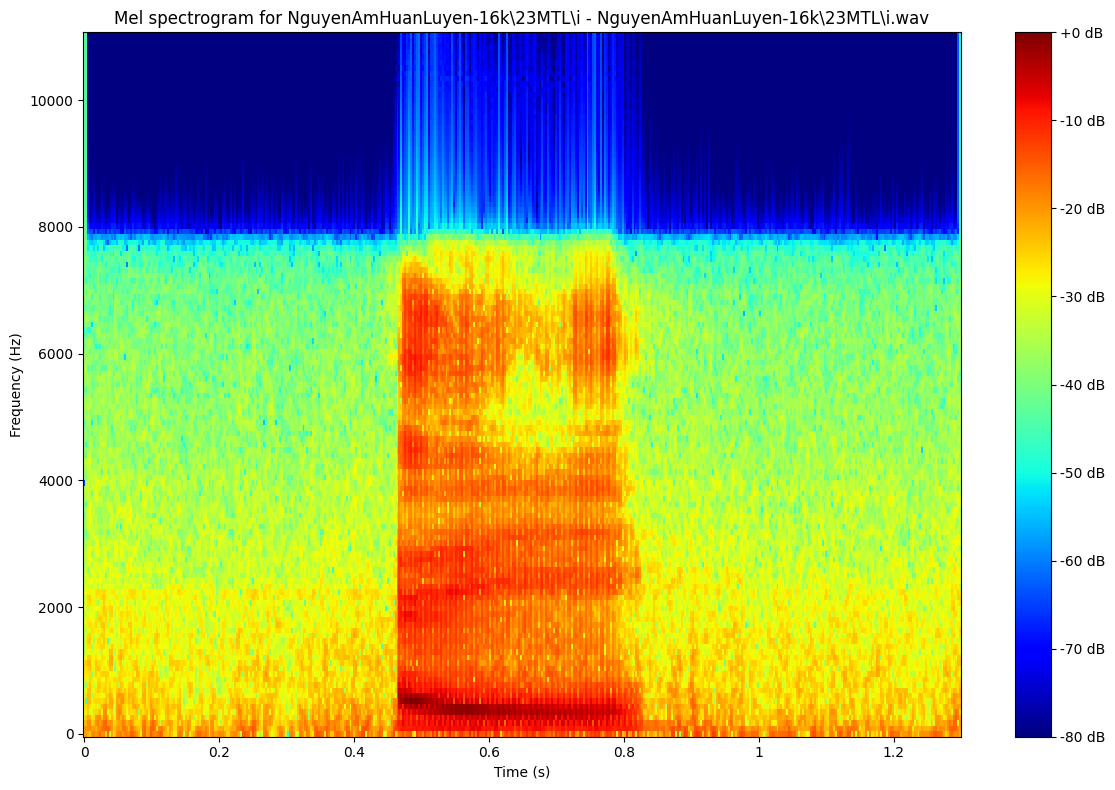

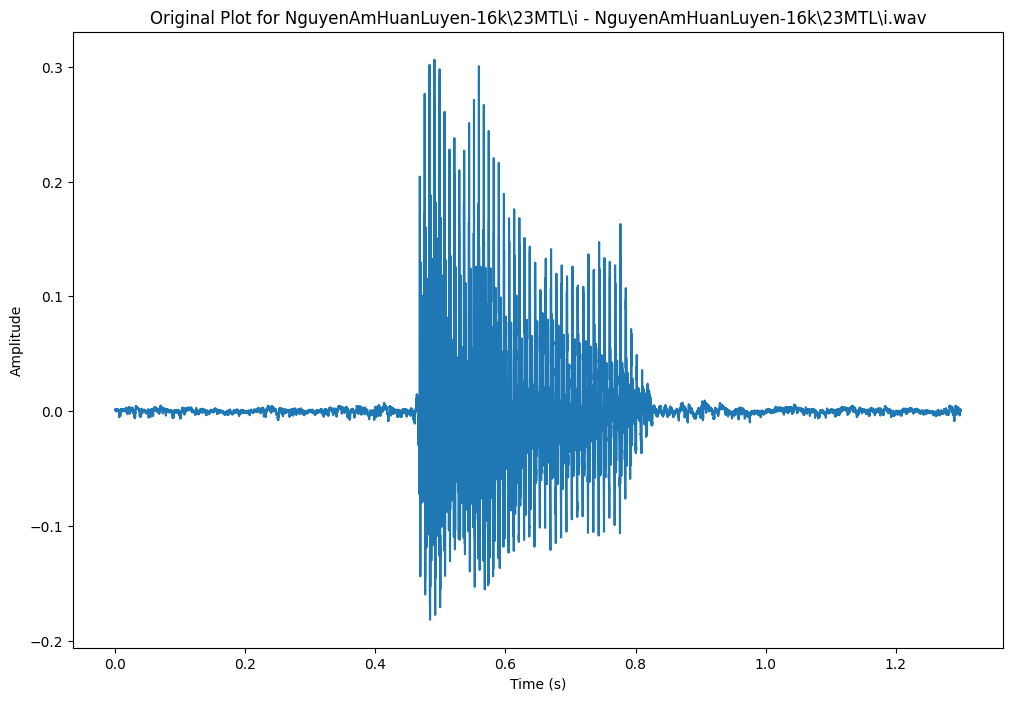

NguyenAmHuanLuyen-16k\23MTL\o.wav NguyenAmHuanLuyen-16k\23MTL\o


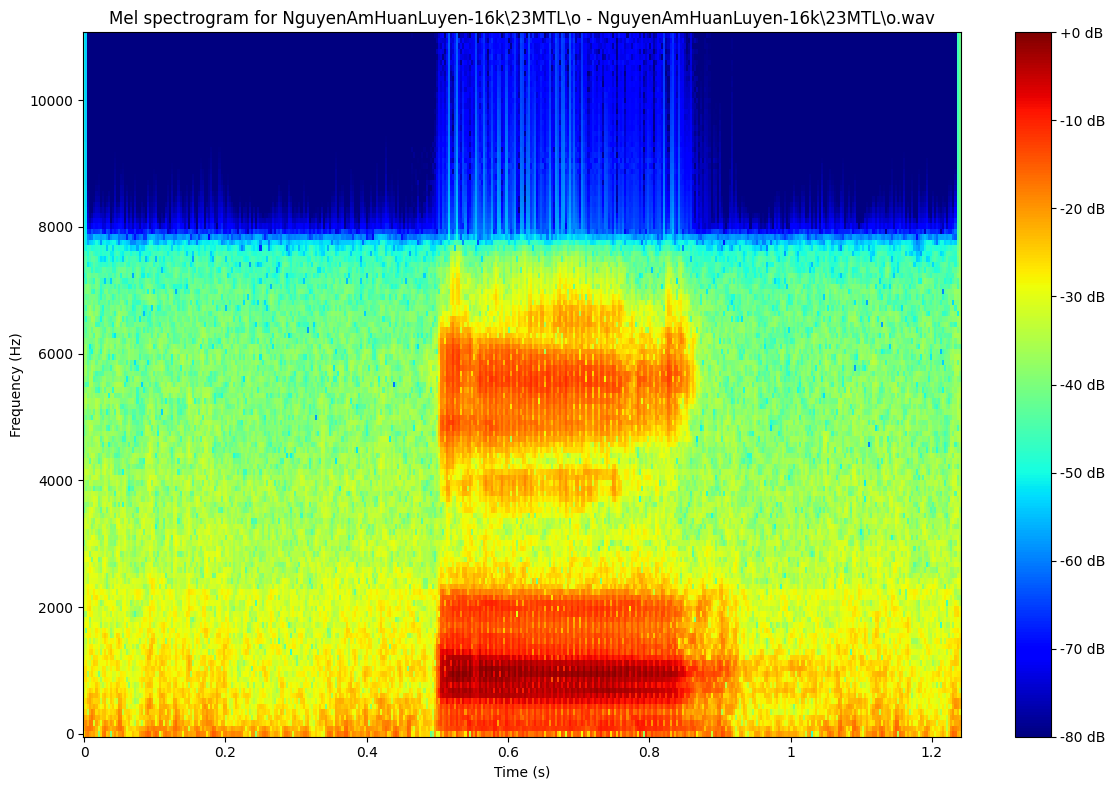

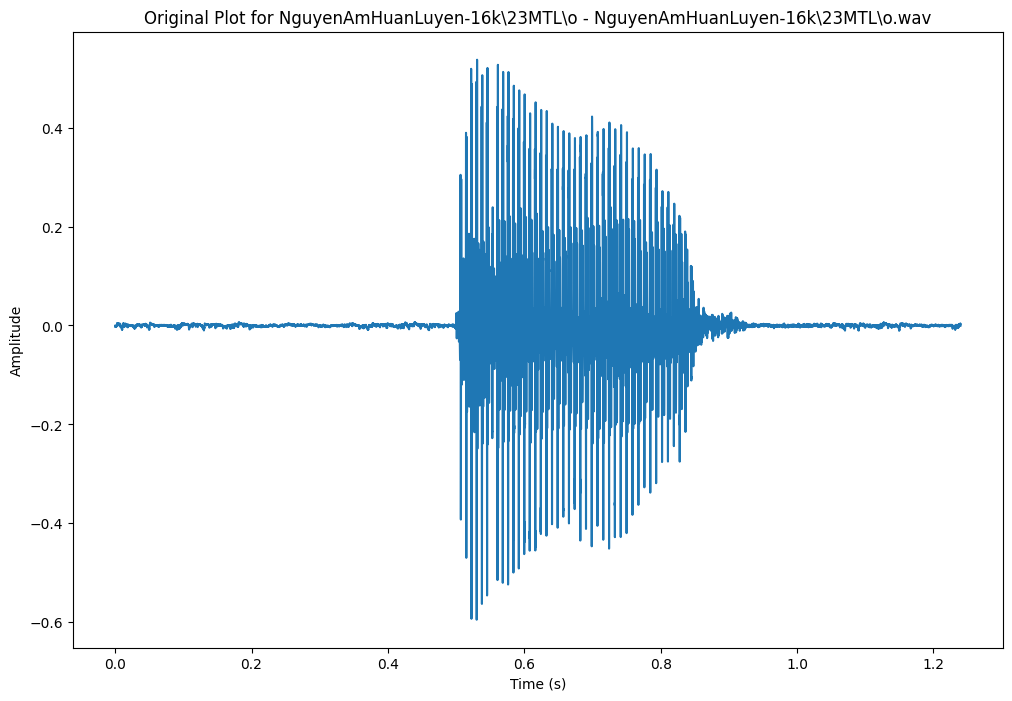

NguyenAmHuanLuyen-16k\23MTL\u.wav NguyenAmHuanLuyen-16k\23MTL\u


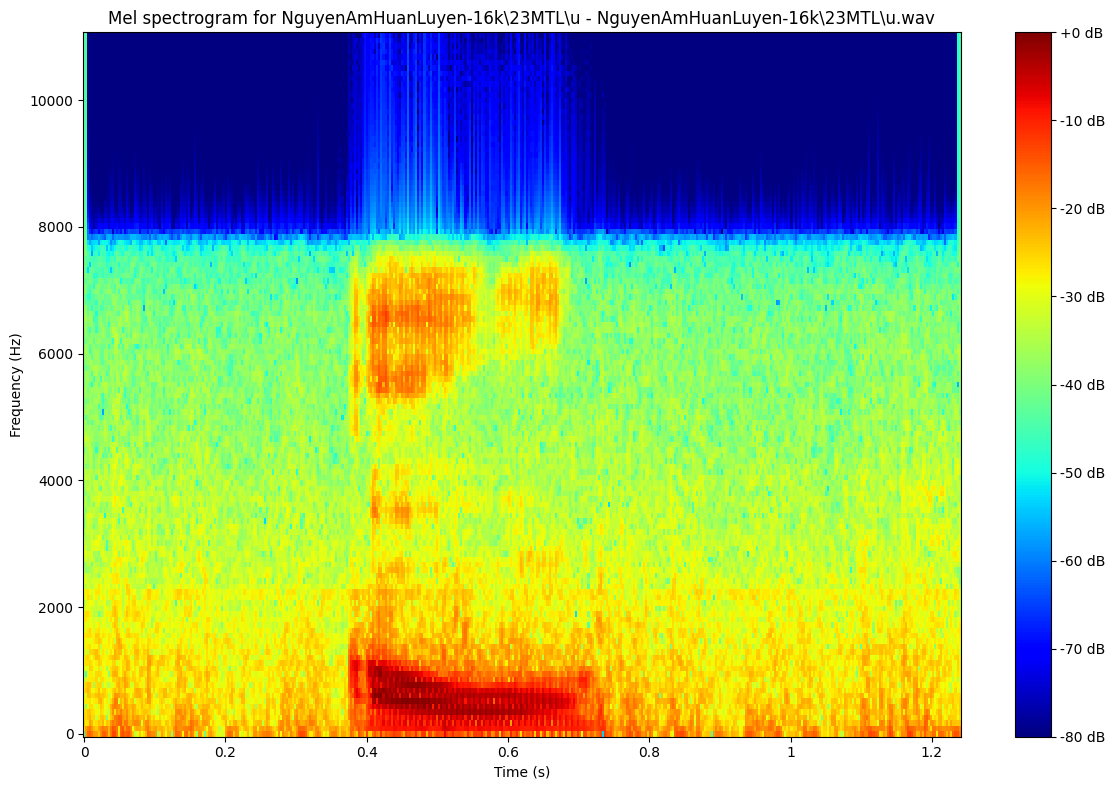

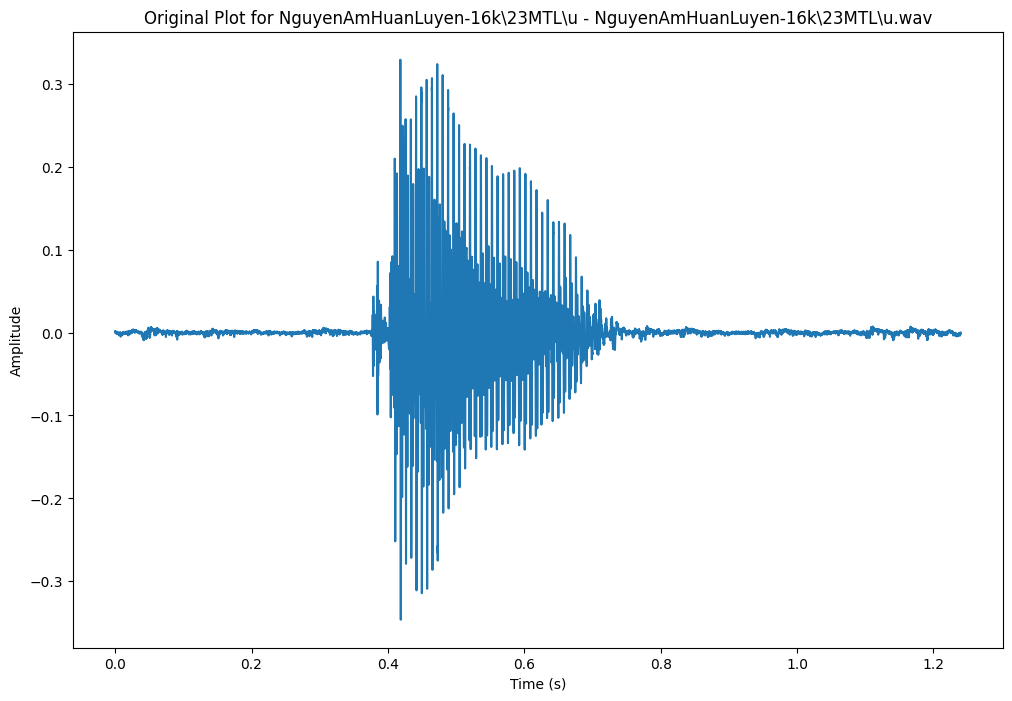

-------------------------------
-----------CHARTS FOR 24FTL-----------
NguyenAmHuanLuyen-16k\24FTL\a.wav NguyenAmHuanLuyen-16k\24FTL\a


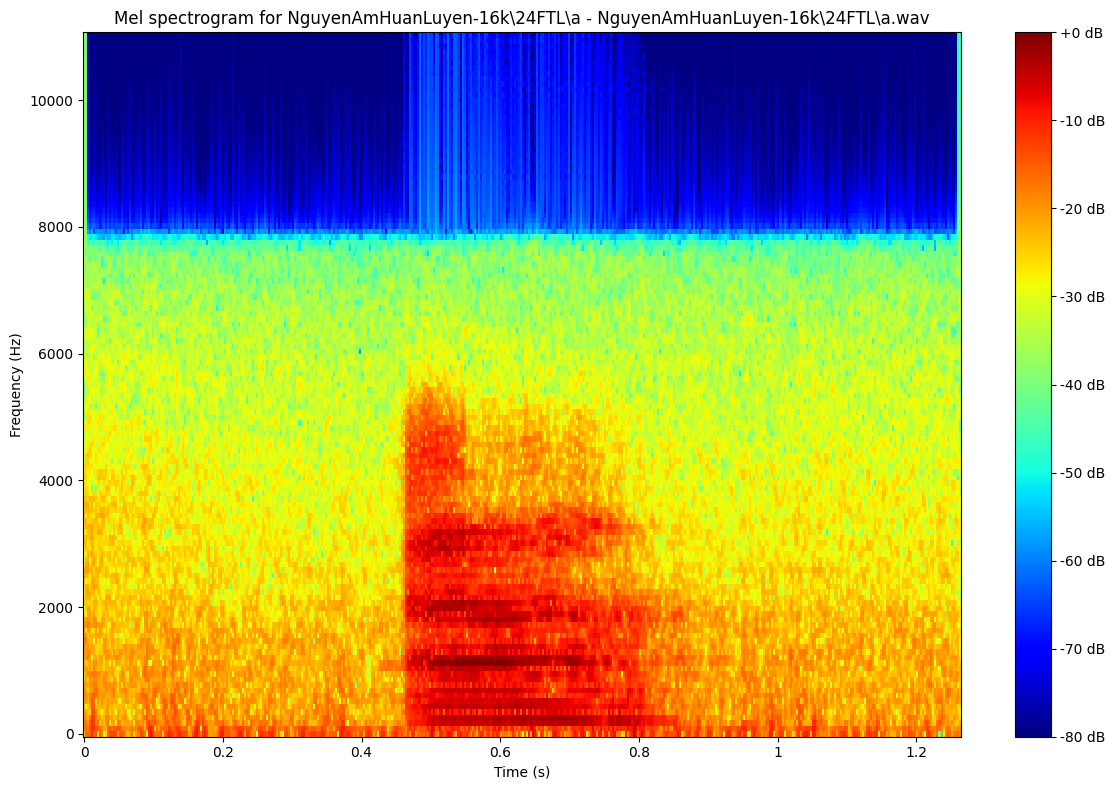

NguyenAmHuanLuyen-16k\24FTL\e.wav NguyenAmHuanLuyen-16k\24FTL\e


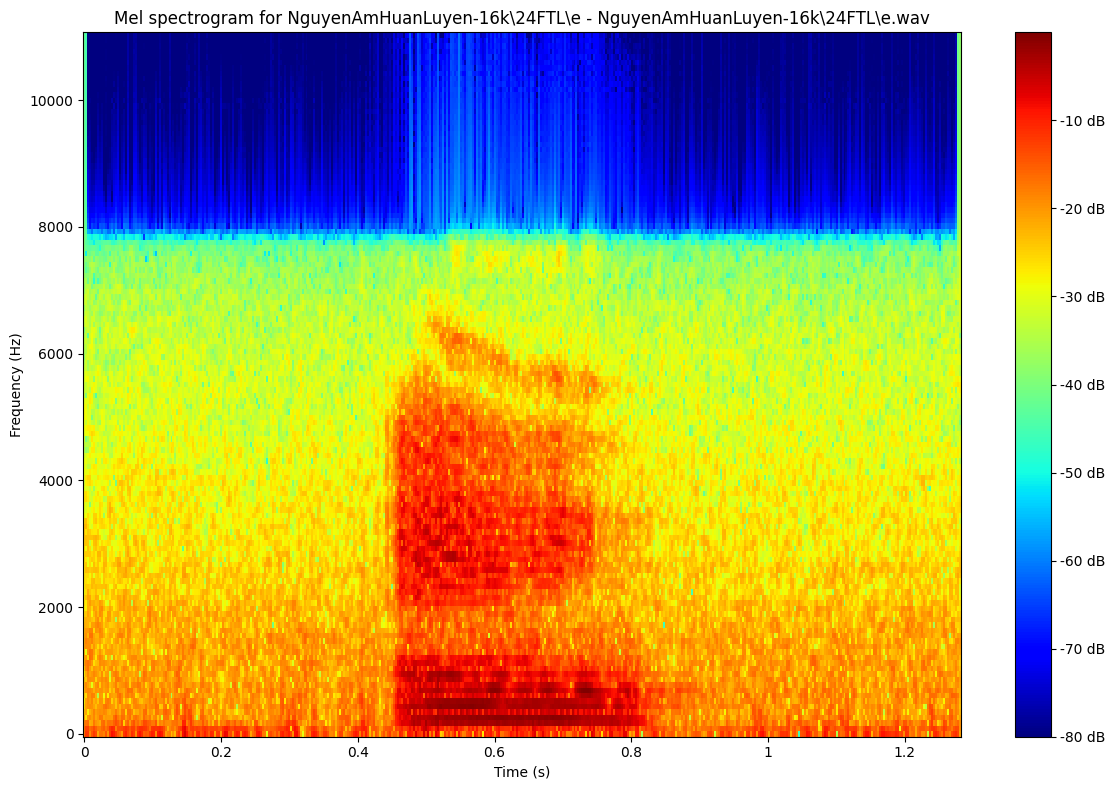

NguyenAmHuanLuyen-16k\24FTL\i.wav NguyenAmHuanLuyen-16k\24FTL\i


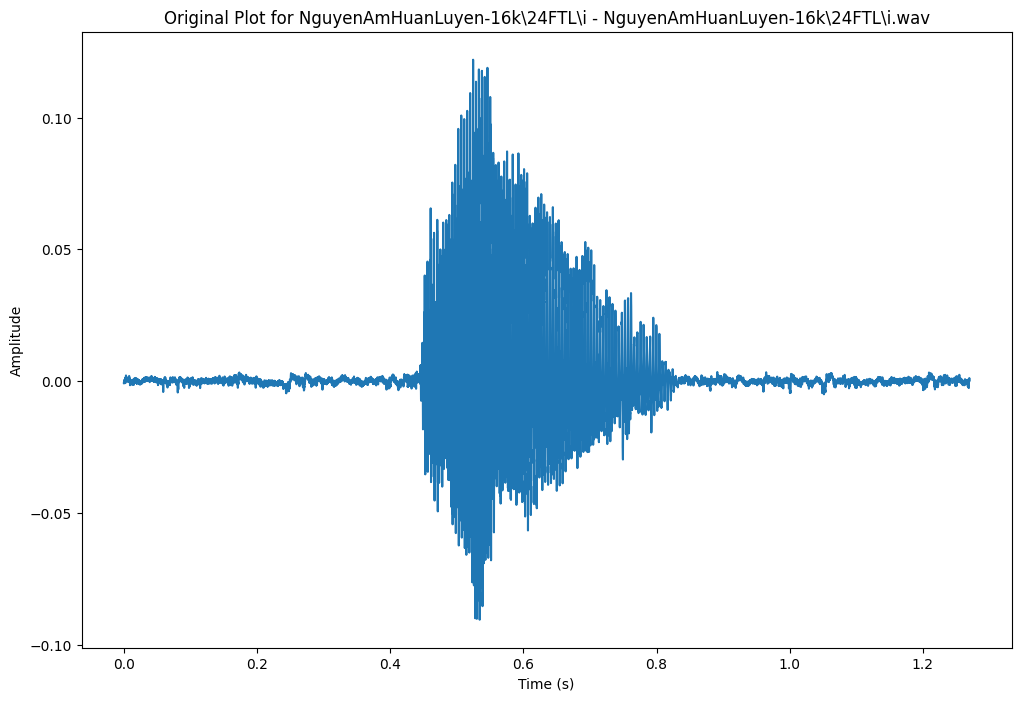

NguyenAmHuanLuyen-16k\24FTL\o.wav NguyenAmHuanLuyen-16k\24FTL\o


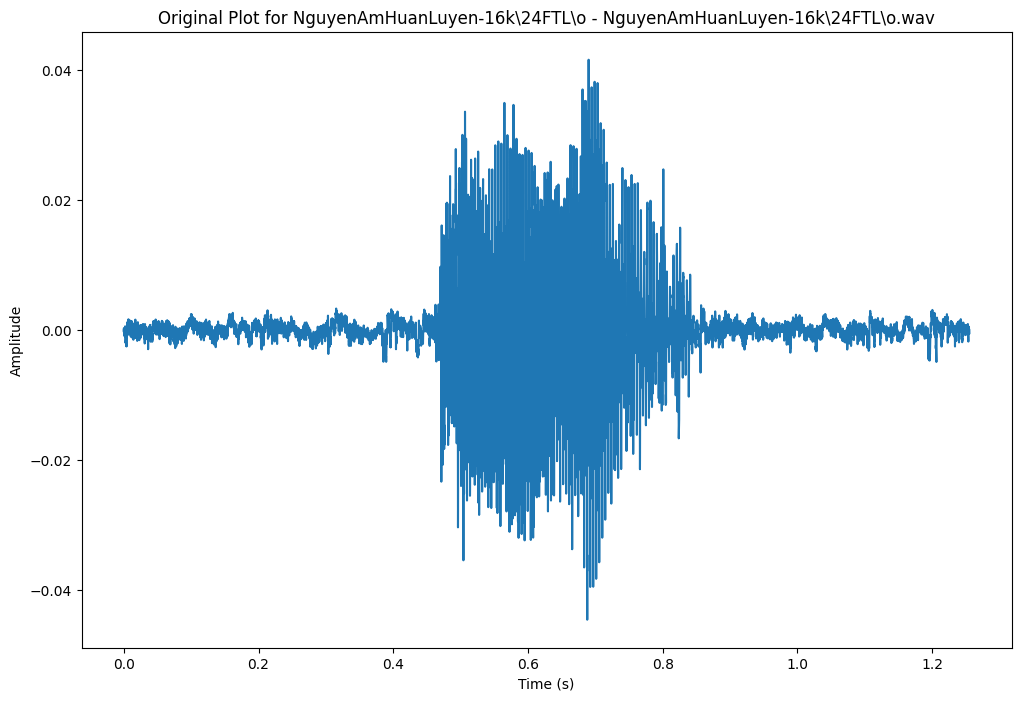

NguyenAmHuanLuyen-16k\24FTL\u.wav NguyenAmHuanLuyen-16k\24FTL\u


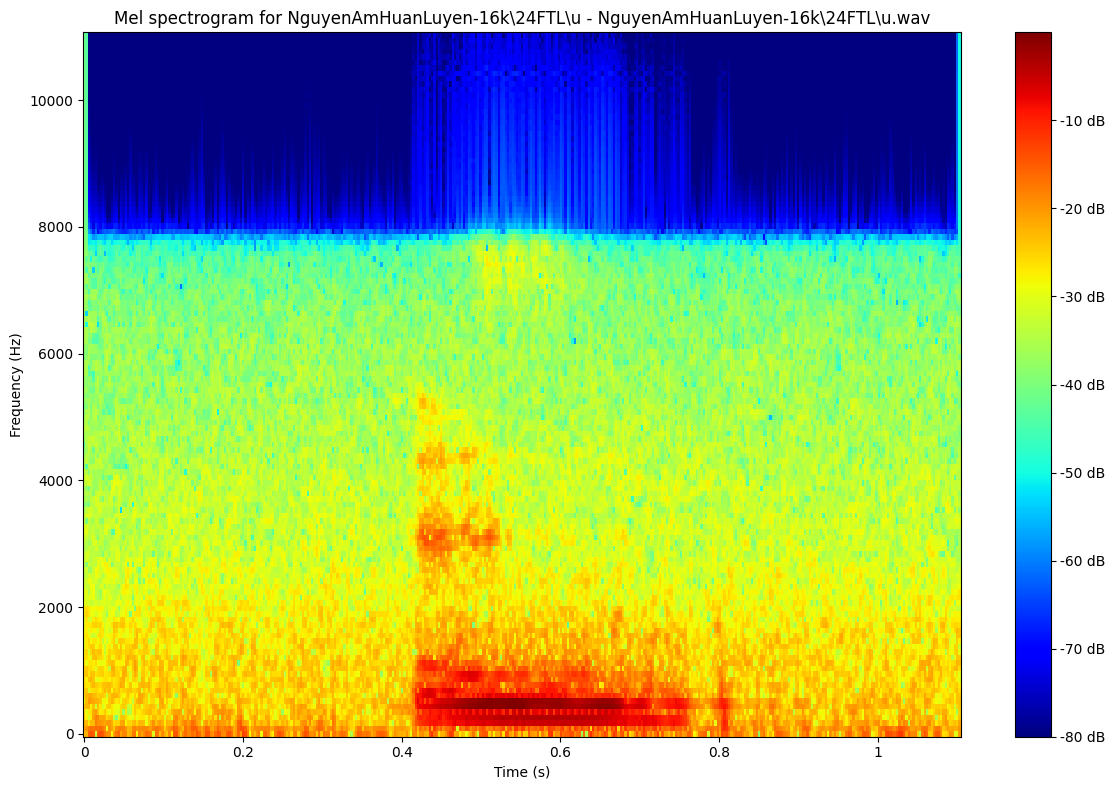

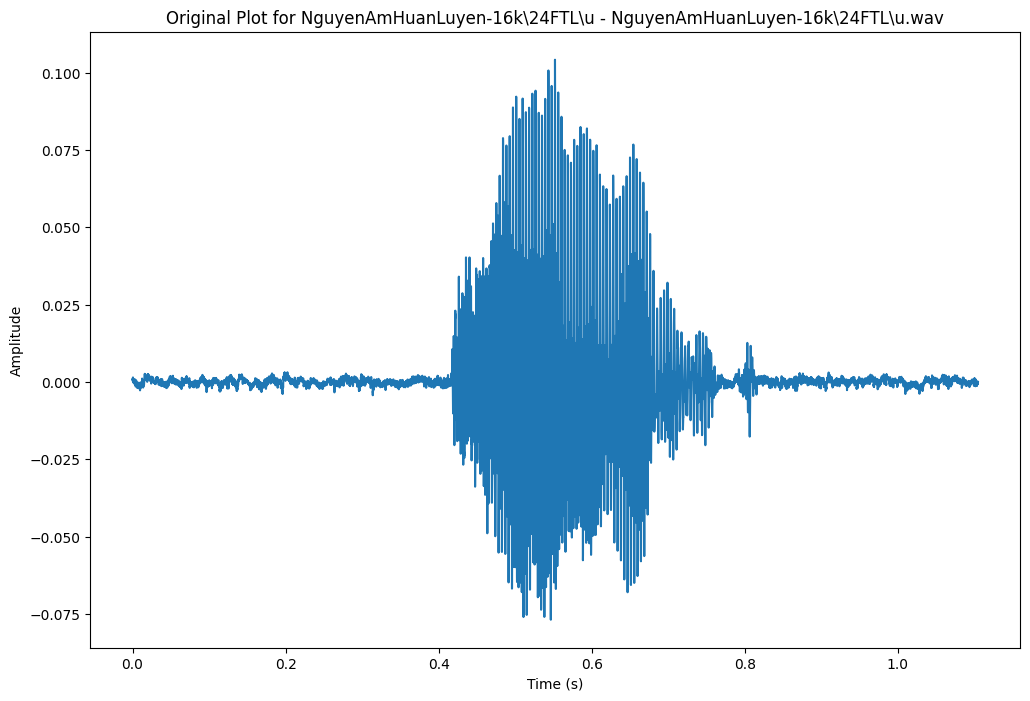

-------------------------------
-----------CHARTS FOR 25MLM-----------
NguyenAmHuanLuyen-16k\25MLM\a.wav NguyenAmHuanLuyen-16k\25MLM\a


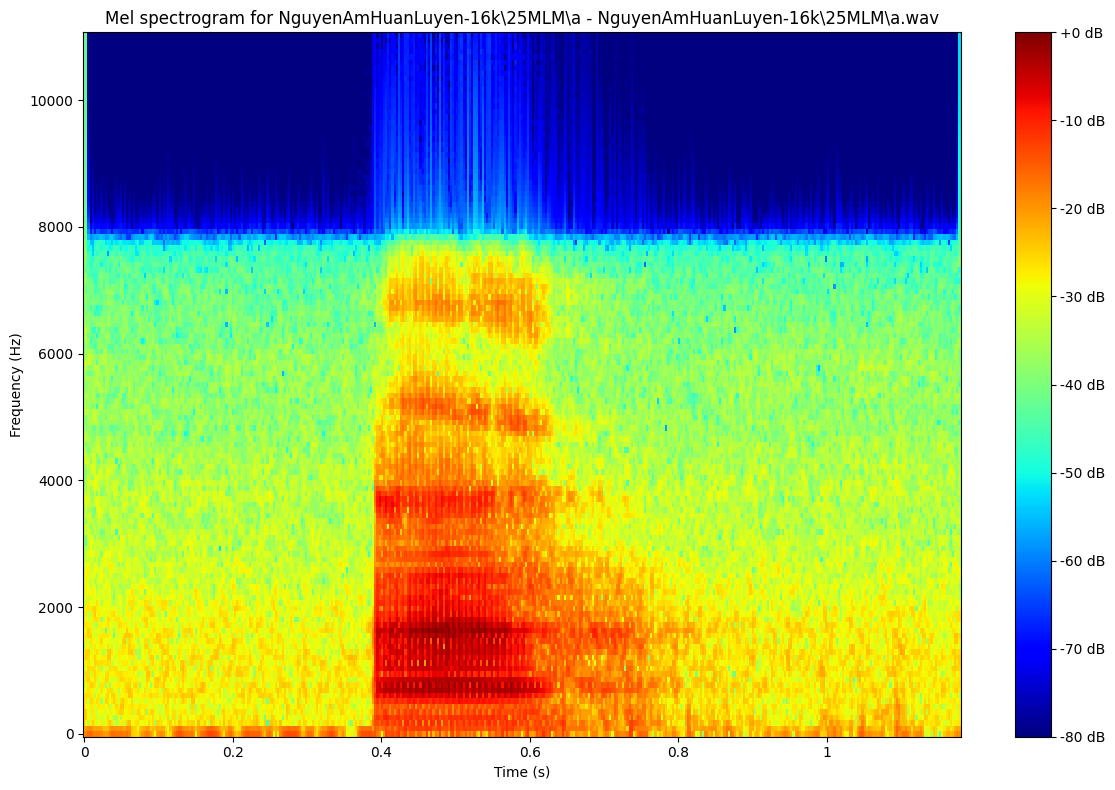

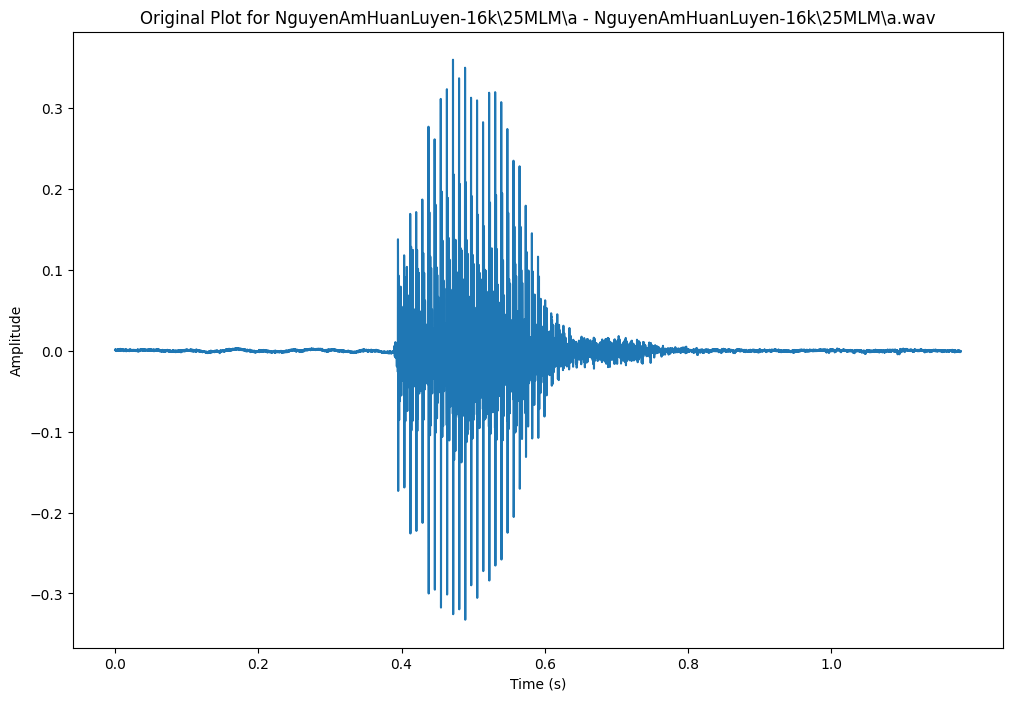

NguyenAmHuanLuyen-16k\25MLM\e.wav NguyenAmHuanLuyen-16k\25MLM\e


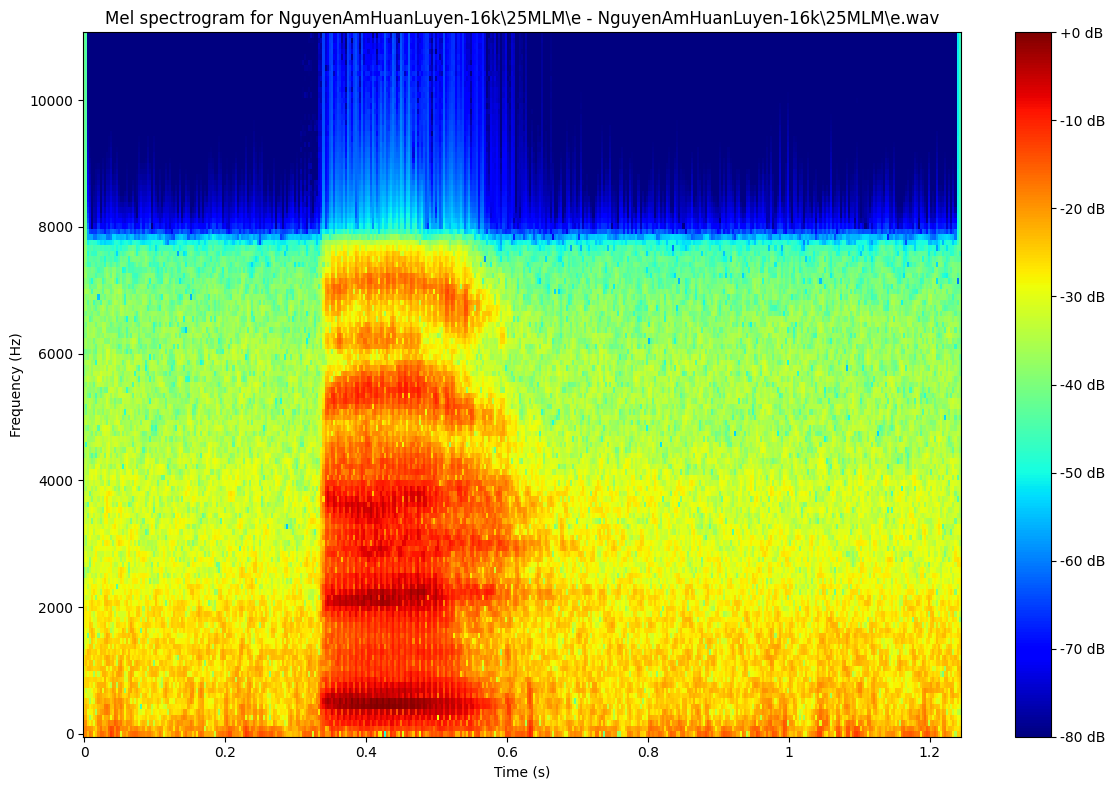

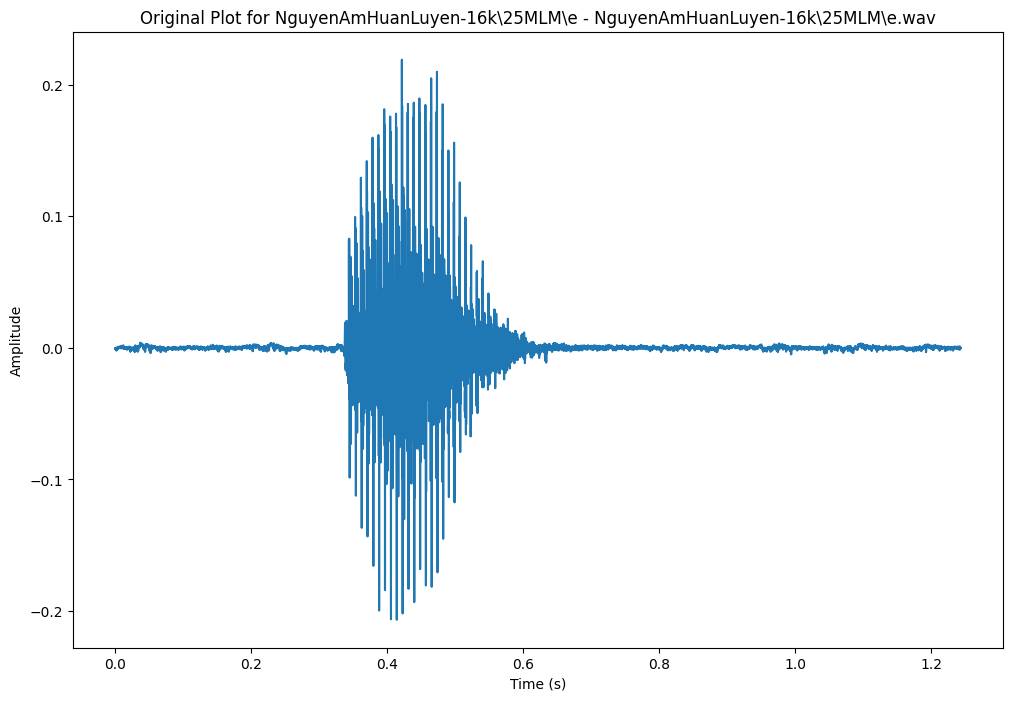

NguyenAmHuanLuyen-16k\25MLM\i.wav NguyenAmHuanLuyen-16k\25MLM\i


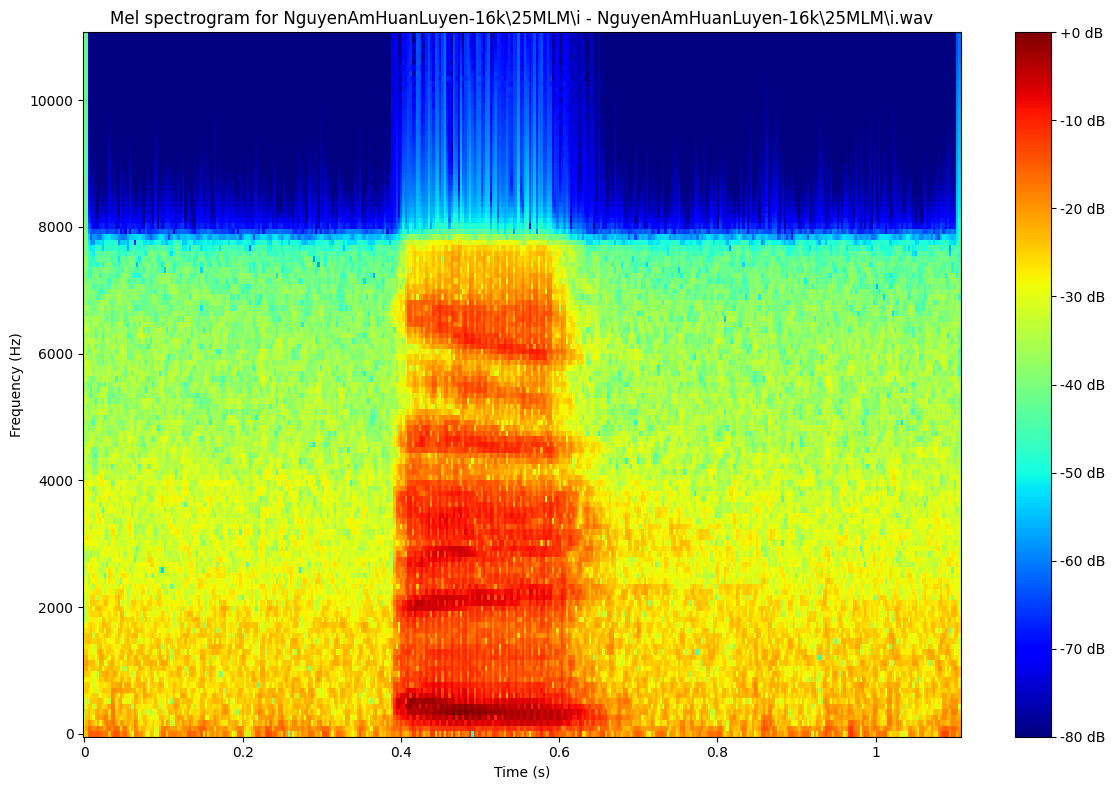

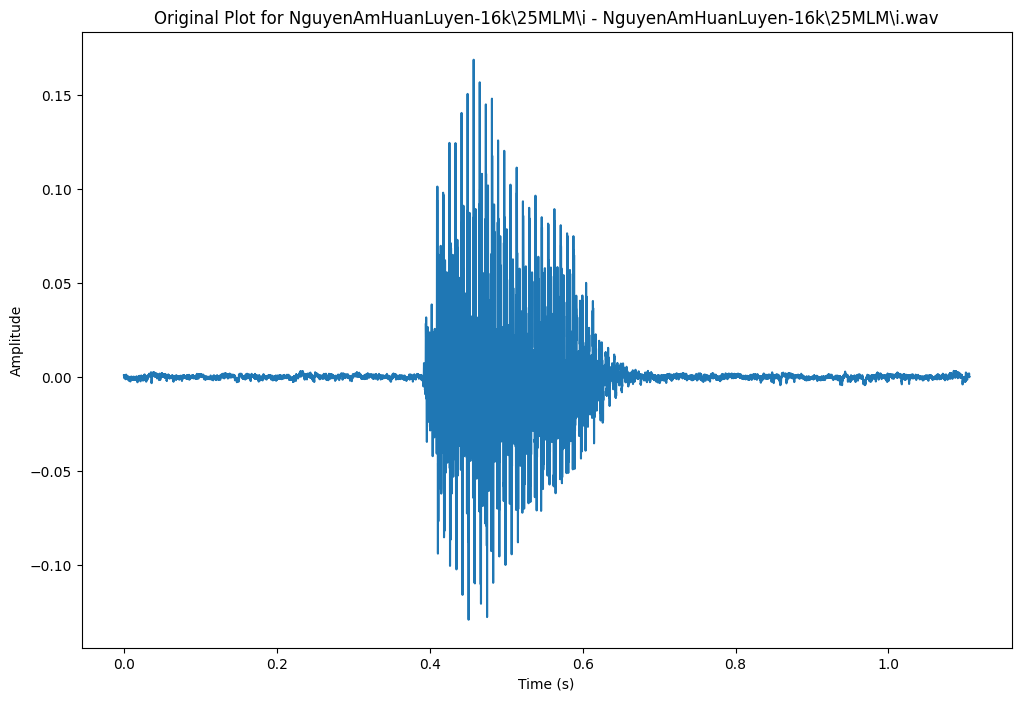

NguyenAmHuanLuyen-16k\25MLM\o.wav NguyenAmHuanLuyen-16k\25MLM\o


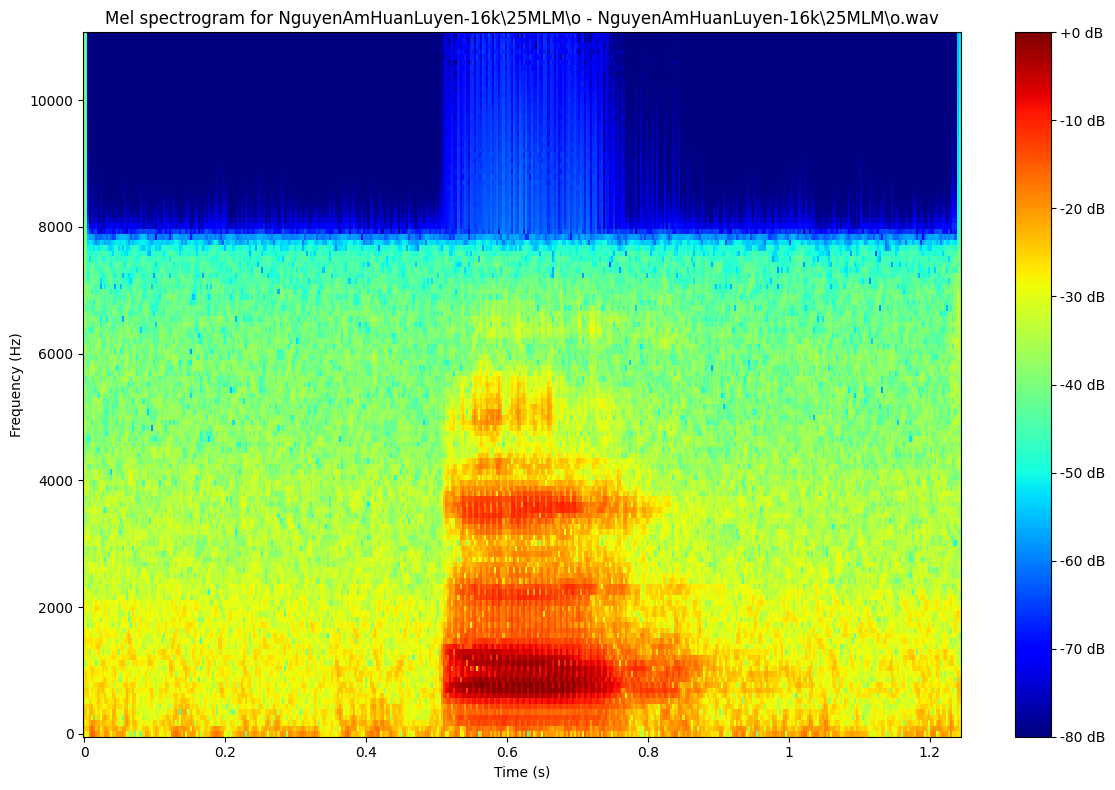

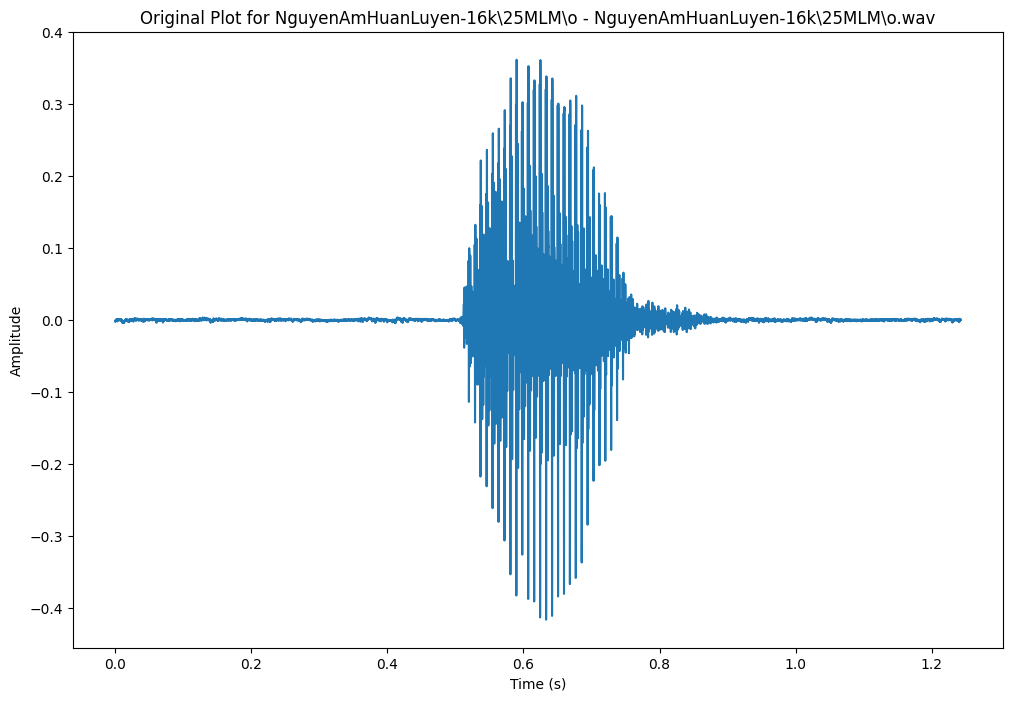

NguyenAmHuanLuyen-16k\25MLM\u.wav NguyenAmHuanLuyen-16k\25MLM\u


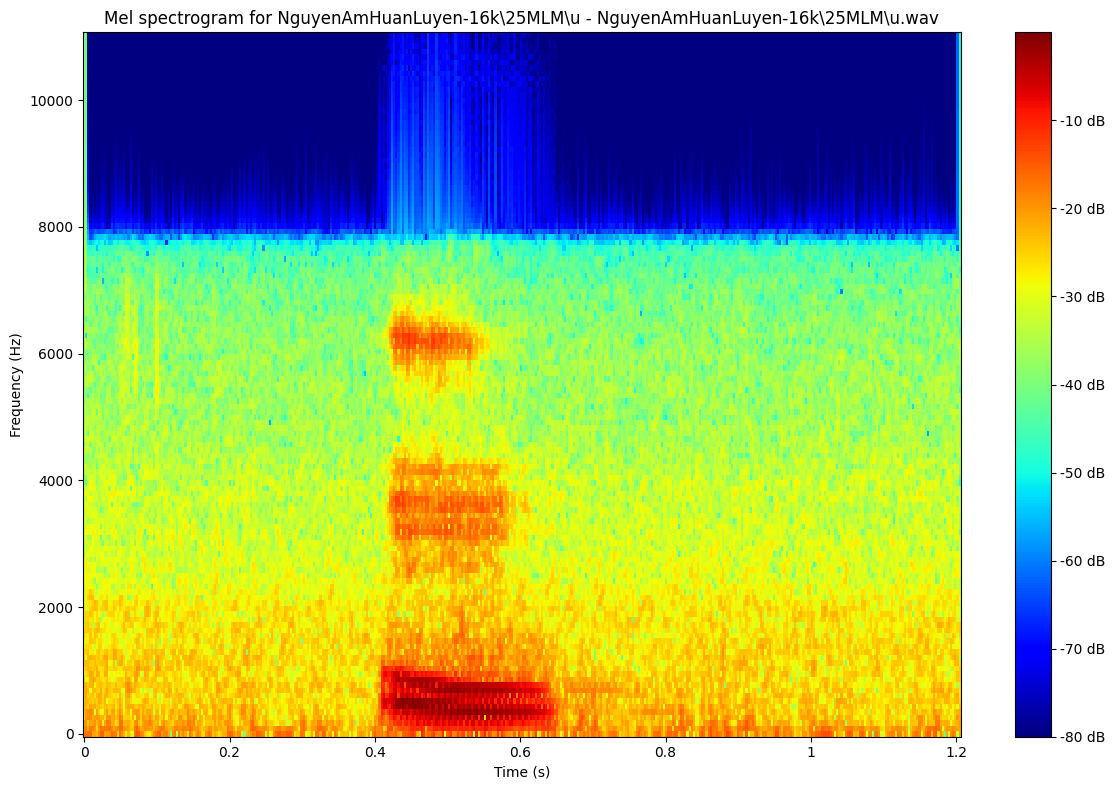

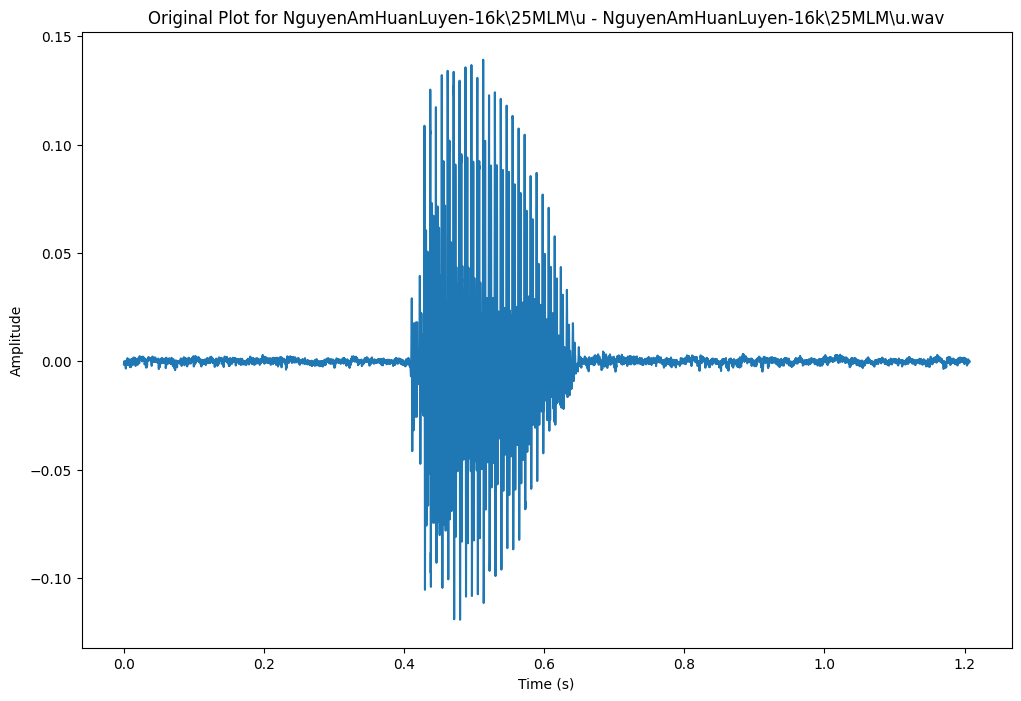

-------------------------------
-----------CHARTS FOR 27MCM-----------
NguyenAmHuanLuyen-16k\27MCM\a.wav NguyenAmHuanLuyen-16k\27MCM\a


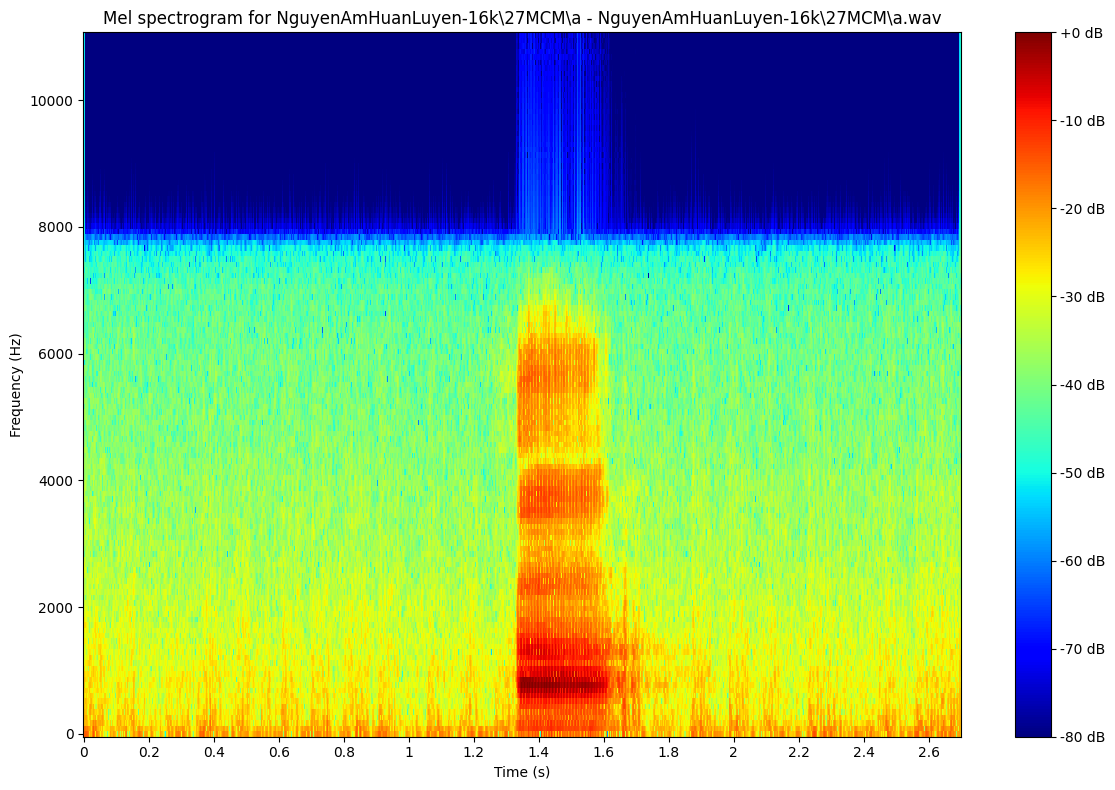

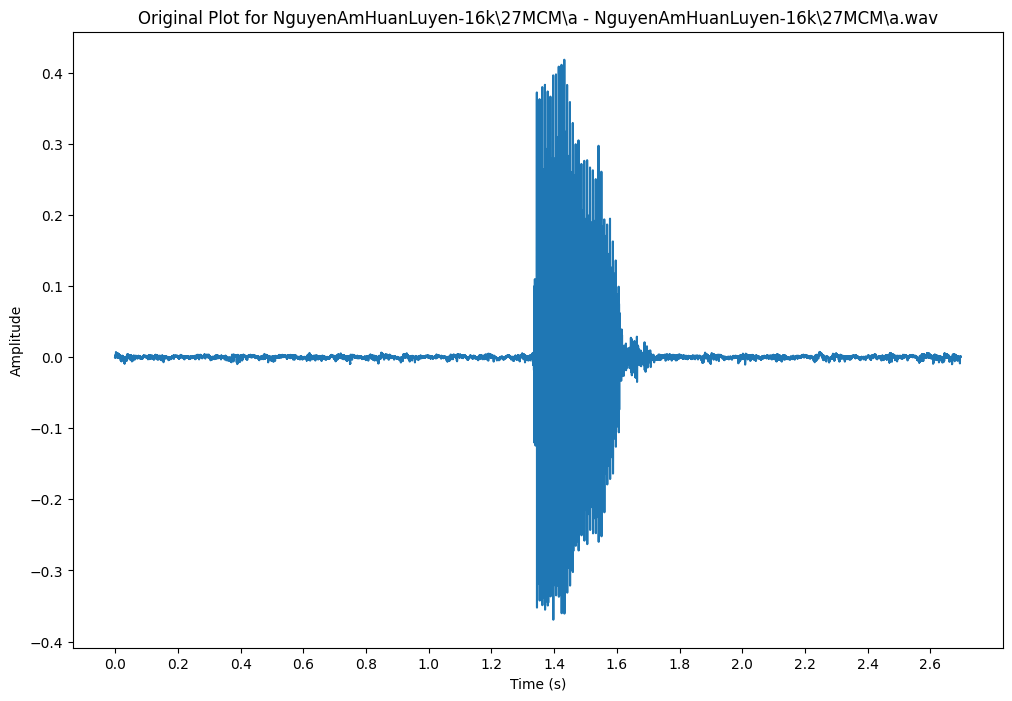

NguyenAmHuanLuyen-16k\27MCM\e.wav NguyenAmHuanLuyen-16k\27MCM\e


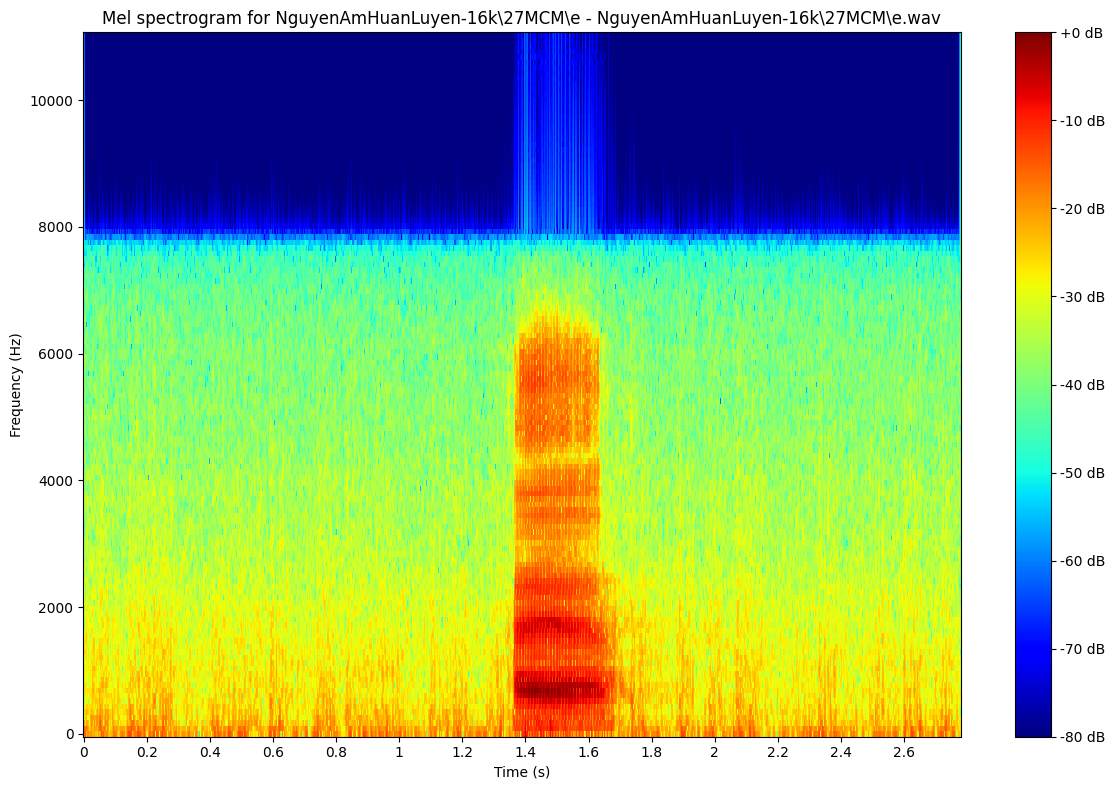

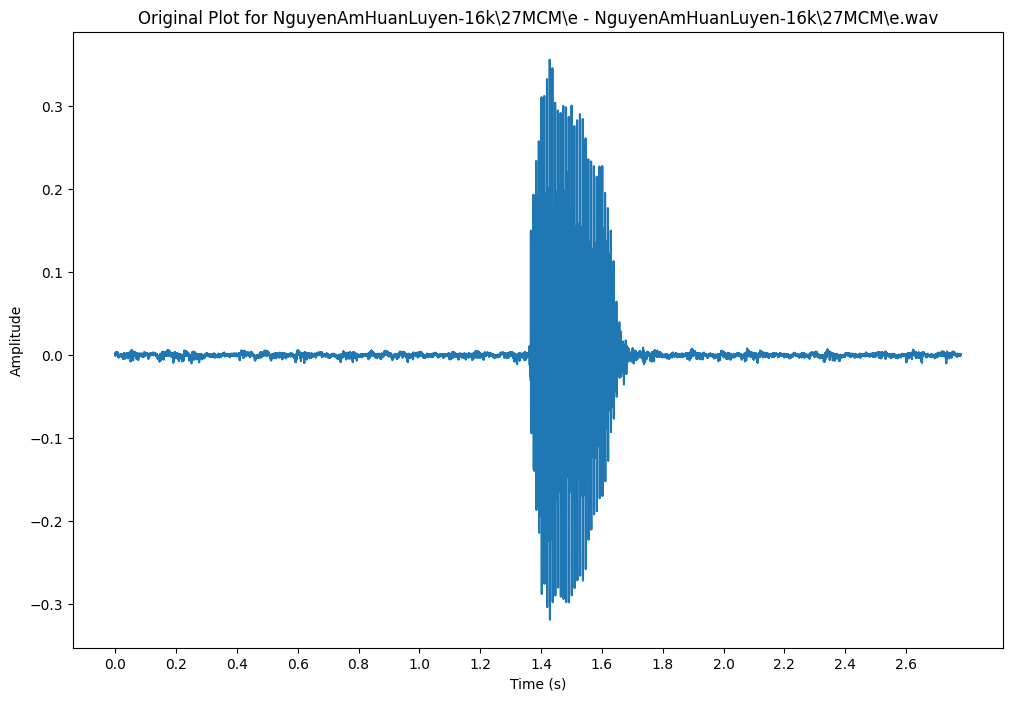

NguyenAmHuanLuyen-16k\27MCM\i.wav NguyenAmHuanLuyen-16k\27MCM\i


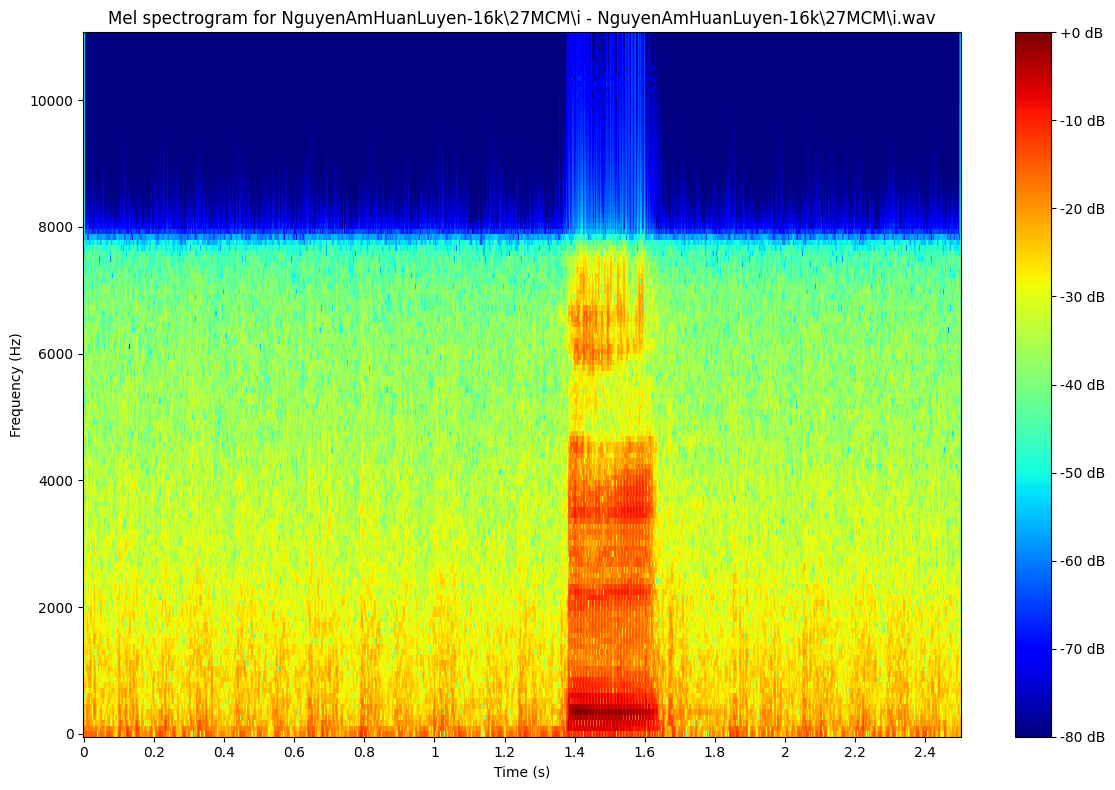

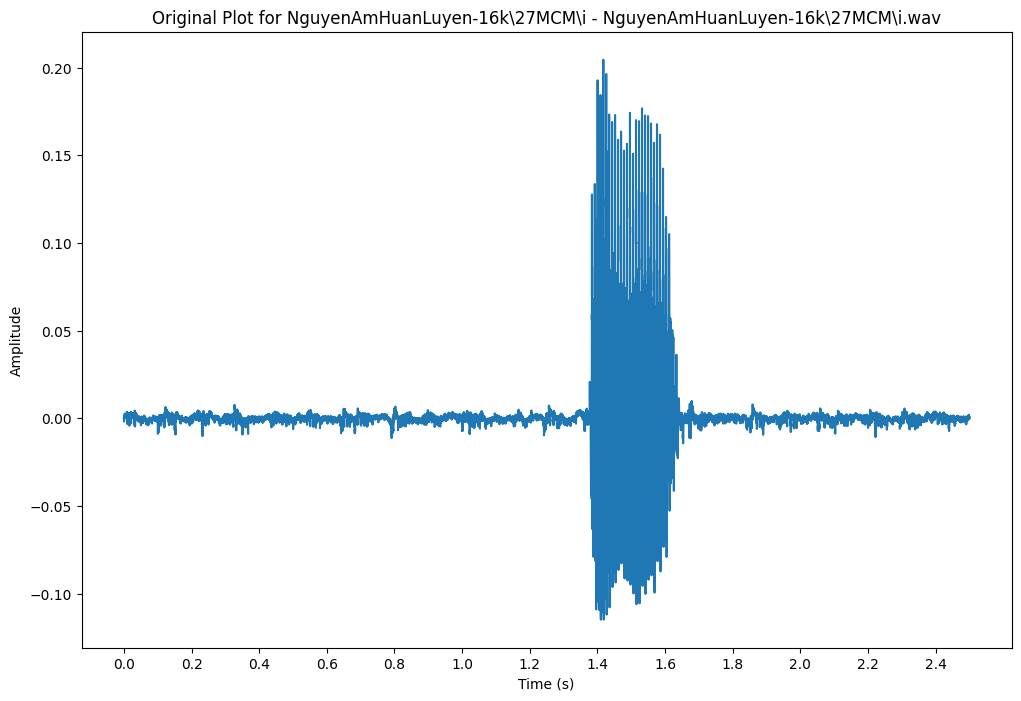

NguyenAmHuanLuyen-16k\27MCM\o.wav NguyenAmHuanLuyen-16k\27MCM\o


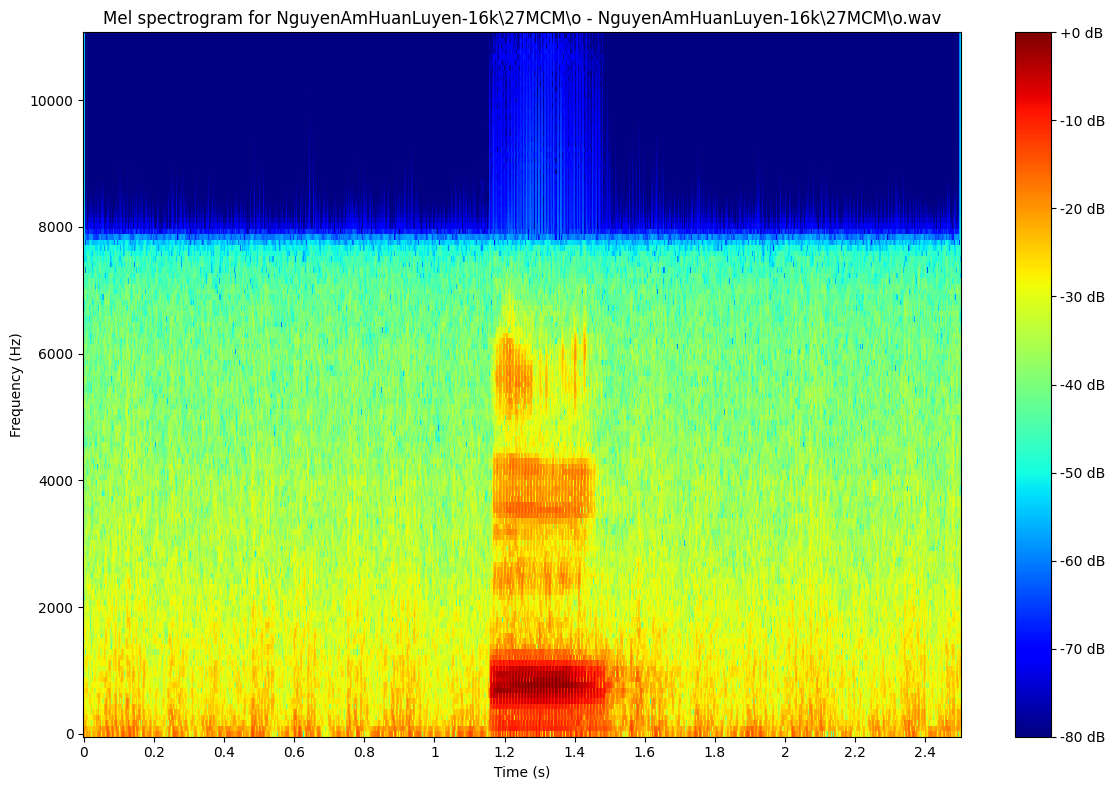

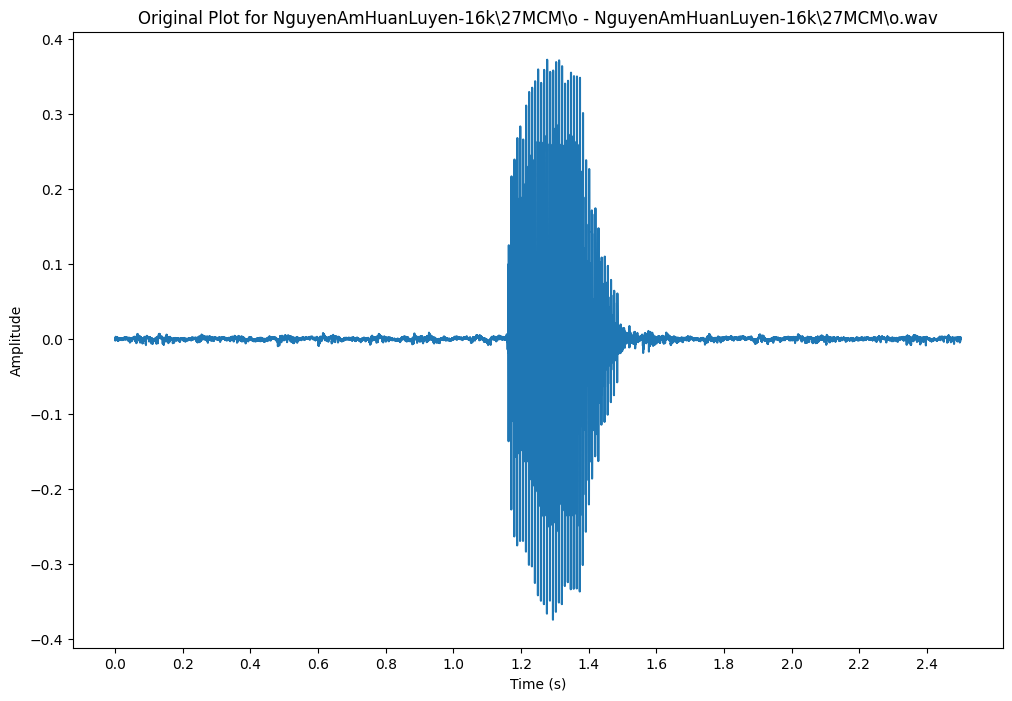

NguyenAmHuanLuyen-16k\27MCM\u.wav NguyenAmHuanLuyen-16k\27MCM\u


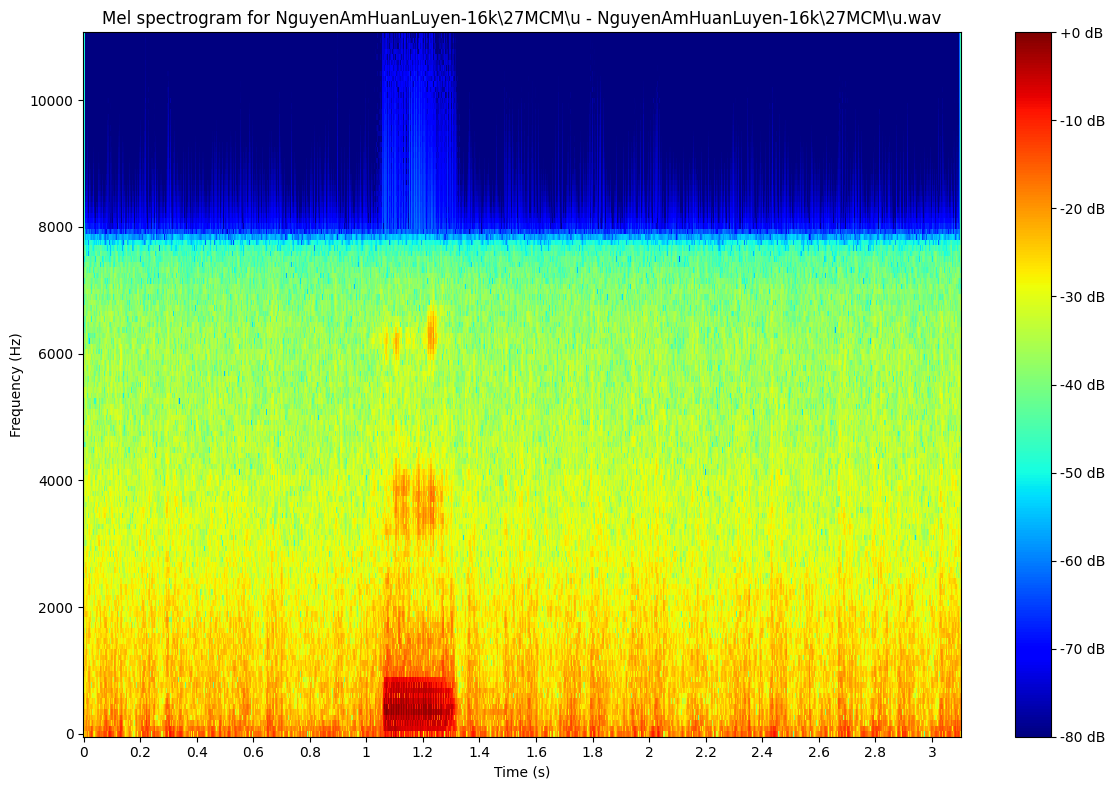

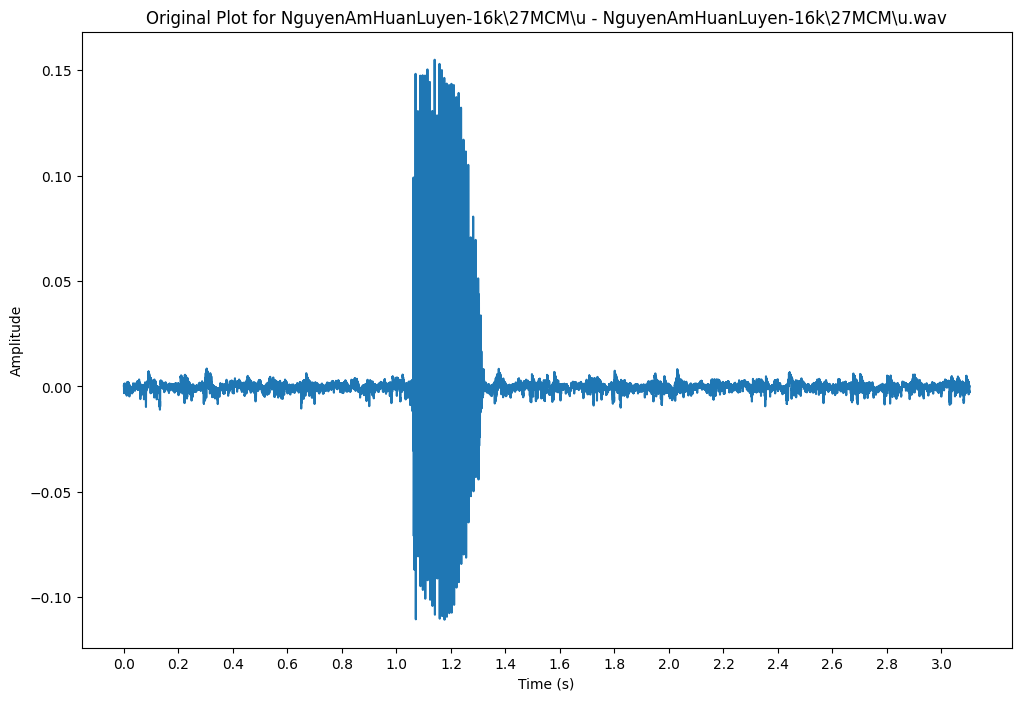

-------------------------------


In [6]:
for item in seletected_elements_folder_audio_data:
    print(f"-----------CHARTS FOR {item['folder_name']}-----------")
    for audio_path in item['audio_files']:
        vowel_file = audio_path.split('/')[-1]
        label_vowel = vowel_file.split('.')[0]
        # Load the audio file
        y, sr = librosa.load(audio_path)
        # Plot Mel spectrogram
        plot_mel_spectrogram(y=y, sr=sr, n_fft=256, hop_length=64, time_division=0.2, title=f'Mel spectrogram for {label_vowel} - {audio_path}')

        # Plot original audio file
        plot_original_audio(y=y, sr=sr, title=f'Original Plot for {label_vowel} - {audio_path}', time_division=0.2)

    print("-------------------------------")

